In [109]:
pwd

'/Users/apple/Desktop/dmhrassign'

In [110]:
cd Desktop

[Errno 2] No such file or directory: 'Desktop'
/Users/apple/Desktop/dmhrassign


In [111]:
cd dmhrassign

[Errno 2] No such file or directory: 'dmhrassign'
/Users/apple/Desktop/dmhrassign


In [112]:
ls

2018_04_Apr/             Untitled.ipynb           gp-reg-pat-prac-all.csv
T201804ADDR+BNFT.CSV     Untitled11.ipynb
T201804PDPI BNFT.CSV*    assignment.py


In [431]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import math
from math import floor

# Assignment A 

Introduction

As is known, National Health Service (NHS) is a clinical system bringing hospitals, doctors, nurses, pharmacists, opticians and dentist together, which was founded in 1948 and turned 70 on 5 July 2018. During the last 70 years, NHS has delivered high quality services and improved the public health, supporting the society well-operation. The NHS website shows that NHS England handles 1 million patients per 36 hours ranging from routine screenings, treatments for long-term conditions, transplants, emergency treatment to end-of-life-care (NHS, 2016). NHS also followed the trend of technology that they introduced many mobile apps to modify the services and satisfy everybody’s requirements, such as baby and Child first aid, my health fabric, be mindful and BECCA breast cancer care app, which were the latest apps. 

STP proposals (OECD, 2017) worked out by NHS and its partner includes some operational plans and contracts, which are capable of providing improvements in many fields such as cancer, mental health and primary care. Continuing is the solid process, however, many problems still exist and need more time such as the residual financial gaps. Actually, there is space to cut costs and reduce waste to the most extent. 

NHS collects funds from taxation directly and the budget increased from £15 billion at the beginning to £116.4 billion in 2015/16, where NHS England occupied the large majority (NHS, 2016). NHS England gathers clinical pharmacists and is subordinated in general practice to support GP prescribing. However, depending on the performance of UK economy made the growth of NHS following the fluctuation of economic cycle. As IFS UK health and social care spending recorded (Emmerson, Johnson & Joyce, 2017), the last five years (from 2009 to 2015) witnessed the lowest rate of growth, close to zero, in public spending per person on health since at least 1955. NHS should control the expenditure since they cannot decide the income. And that is why NHS announced the necessity to make “efficiency savings”. Firstly, NHS should clear out the hospital beds for patients who need them most. Since approximately 2500 hospital beds were taken up by patients awaiting the social care but already able to leave hospital (HM Treasury, 2017), the extra cost for delayed transfers will exist. Secondly, it is recommended to shrink agency and temporary staffing costs. NHS employed over 1.5 million staffs, which ensured its top five place in the world’s largest workforces that also include the US Department of Defence, McDonalds, Walmart and the Chinese People’s Liberation Army (NHS, 2016). The extra cost for temporary staffs will add more burden to NHS. Another important point for NHS is trying to negotiate the suitable prices of medicines and pharmacy. It is said that NHS England drugs bill grew by more than 7% for one year, which was significantly larger than the whole NHS budget (NHS England, 2017). The first part pf this report will demonstrate the patient population, cost of drugs for cardiovascular disease and antidepressants in general practices and relationships between them with the GP Prescribing dataset (April 2018). The second part will clarify the mortality pattern and population pattern in different countries. 

Methods

Firstly, we import pandas, NumPy and matplotlib as tool. Then, we read the csv file downloaded from the GP Practice Prescribing dataset and define the address for practice file as ADDR. Since we are required to calculate the total number of patients registered in GP London, we select the GP address for London. The last three columns for ADDR are named as ‘county’, ‘city’ and ‘postcode’, thus we choose to match ‘county’ and ‘city’ with London and we can find 929 records on London GP. Also, we read the patients records in all practices and name it as ‘patients’. We link these two datasets by the same practice code and we find that there are 747 records in file ‘patients’ with London GP practice. Therefore, the number of patients can be calculated by summing the patients’ population with London code in file ‘patients’, which is 5841956. 

In [114]:
# Q1
ADDR = pd.read_csv("T201804ADDR+BNFT.CSV",
                  names =["date", "number", "address1", "address2", "ADDRESS1", "county", "city", "postcode"])

In [254]:
ADDR['city'] = ADDR['city'].str.strip()
ADDR['county'] = ADDR['county'].str.strip()

In [255]:
londonprac = ADDR.loc[(ADDR['city'] == 'LONDON')|(ADDR['county'] == 'LONDON')]
print(londonprac)
londonCode = londonprac['number'].tolist()
print(len(londonCode))

        date  number                                  address1  \
1873  201804  E83003  OAKLEIGH ROAD HEALTH CENTRE                
1874  201804  E83005  LICHFIELD GROVE SURGERY                    
1875  201804  E83006  GREENFIELD MEDICAL CENTRE                  
1876  201804  E83007  SQUIRES LANE MEDICAL PRACTICE              
1877  201804  E83008  HEATHFIELDE MEDICAL CENTRE                 
1878  201804  E83009  PHGH DOCTORS                               
1879  201804  E83010  THE SPEEDWELL PRACTICE                     
1883  201804  E83016  MILLWAY MEDICAL PRACTICE                   
1886  201804  E83020  ST. GEORGES MEDICAL CENTRE                 
1887  201804  E83021  TORRINGTON PARK GROUP PRACTICE             
1888  201804  E83024  ST ANDREWS MEDICAL PRACTICE.               
1889  201804  E83025  PENNINE DRIVE PRACTICE                     
1891  201804  E83027  188 THE PRACTICE                           
1896  201804  E83034  MULKIS HB-THE SURGERY                      
1897  2018

In [188]:
#patients code selected from gp_pat file
patients = pd.read_csv("gp-reg-pat-prac-all.csv")
patcode = patients.CODE.values
list(patcode)

['A83005',
 'A83006',
 'A83010',
 'A83013',
 'A83031',
 'A83034',
 'A83040',
 'A83047',
 'A83048',
 'A83070',
 'A83641',
 'A83001',
 'A83003',
 'A83004',
 'A83007',
 'A83008',
 'A83012',
 'A83015',
 'A83017',
 'A83019',
 'A83020',
 'A83021',
 'A83025',
 'A83032',
 'A83035',
 'A83037',
 'A83041',
 'A83042',
 'A83043',
 'A83044',
 'A83045',
 'A83046',
 'A83051',
 'A83052',
 'A83054',
 'A83057',
 'A83060',
 'A83061',
 'A83066',
 'A83071',
 'A83074',
 'A83075',
 'A83603',
 'A83610',
 'A83616',
 'A83619',
 'A83626',
 'A83627',
 'A83634',
 'A83009',
 'A83011',
 'A83014',
 'A83016',
 'A83018',
 'A83022',
 'A83023',
 'A83024',
 'A83026',
 'A83027',
 'A83028',
 'A83029',
 'A83030',
 'A83033',
 'A83036',
 'A83038',
 'A83049',
 'A83050',
 'A83055',
 'A83072',
 'A83073',
 'A83076',
 'A83617',
 'A83618',
 'A83622',
 'A83630',
 'A83632',
 'A83635',
 'A83636',
 'A83637',
 'A83644',
 'A81001',
 'A81002',
 'A81006',
 'A81007',
 'A81011',
 'A81014',
 'A81017',
 'A81025',
 'A81027',
 'A81031',
 'A81034',

In [118]:
#list london GP amount from ADDR
LONDONCODE = list (londonprac.number.values)
LONDONCODE

['E83003',
 'E83005',
 'E83006',
 'E83007',
 'E83008',
 'E83009',
 'E83010',
 'E83016',
 'E83020',
 'E83021',
 'E83024',
 'E83025',
 'E83027',
 'E83034',
 'E83035',
 'E83037',
 'E83039',
 'E83041',
 'E83045',
 'E83046',
 'E83049',
 'E83050',
 'E83600',
 'E83621',
 'E83622',
 'E83631',
 'E83633',
 'E83637',
 'E83638',
 'E83639',
 'E83649',
 'E83653',
 'E84006',
 'E84011',
 'E84012',
 'E84015',
 'E84021',
 'E84023',
 'E84025',
 'E84026',
 'E84028',
 'E84030',
 'E84031',
 'E84036',
 'E84042',
 'E84048',
 'E84049',
 'E84067',
 'E84074',
 'E84076',
 'E84077',
 'E84078',
 'E84080',
 'E84086',
 'E84624',
 'E84637',
 'E84645',
 'E84656',
 'E84665',
 'E84667',
 'E84674',
 'E85003',
 'E85005',
 'E85008',
 'E85013',
 'E85014',
 'E85016',
 'E85019',
 'E85020',
 'E85025',
 'E85026',
 'E85028',
 'E85029',
 'E85030',
 'E85032',
 'E85033',
 'E85034',
 'E85038',
 'E85040',
 'E85041',
 'E85042',
 'E85048',
 'E85051',
 'E85055',
 'E85057',
 'E85074',
 'E85075',
 'E85077',
 'E85088',
 'E85091',
 'E85099',

In [119]:
#match code and number from two dataset
#number of matched GP codes
London_GP = patients.loc[patients['CODE'].isin (LONDONCODE)]
print(len(London_GP))

747


In [140]:
#number of patients in London GP
London_GP.NUMBER_OF_PATIENTS.sum()

5841956

Moreover, in order to work out the total amount of prescriptions, we read another csv file including all prescription records such as drug act cost and quantity, and we name it as PDPI. Practice code in PDPI will be linked to London code, thus the prescription in London can be collected into a table, where ‘QUANTITY’ can be summed together to obtain the total number of prescriptions as 510136987. 

In [120]:
#read the prescription file
PDPI = pd.read_csv("T201804PDPI BNFT.CSV", header = None, index_col = False, skiprows = 1,
                   names =["SHA", "PCT", "PRACTICE", "BNF_CODE", "BNF_NAME", "ITEMS", "NIC", "ACT_COST", "QUANTITY", "PERIOD"].rename(columns=lambda x: x.strip())
PDPI.head()

,SHA,PCT,PRACTICE,BNF_CODE,BNF_NAME,ITEMS,NIC,ACT_COST,QUANTITY,PERIOD
0,Q44,RTV,Y04937,0401010Z0AAAAAA,Zopiclone_Tab 7.5mg,6,1.56,2.12,63,201804
1,Q44,RTV,Y04937,0401020K0AAAHAH,Diazepam_Tab 2mg,4,0.87,1.15,73,201804
2,Q44,RTV,Y04937,0401020K0AAAIAI,Diazepam_Tab 5mg,2,0.46,0.56,35,201804
3,Q44,RTV,Y04937,0402010ABAAABAB,Quetiapine_Tab 25mg,1,2.60,2.52,14,201804
4,Q44,RTV,Y04937,0402010ADAAAAAA,Aripiprazole_Tab 10mg,1,1.53,1.53,14,201804


In [121]:
#total prescription in london
London_presc = PDPI.loc[PDPI['PRACTICE'].isin(LONDONCODE)]
London_presc.QUANTITY.sum()

510136987

We can also add the ‘ACT COST’ in the London prescription table to figure out the total actual cost (£43322000.54) of these prescriptions in April 2018, which seems to be a large expenditure for NHS budget. To establish countermeasure regarding ‘Efficiency Savings’, we need to check top 10 and bottom 10 in the list of most frequently-used drugs through summing each quantity by ‘BNF NAME’ and sorting the London prescription table by ‘QUANTITY’ in the descending order for former one and ascending order for the later. 

In [122]:
#total cost for all chosen prescription using act cost
London_presc_cost = PDPI.loc[PDPI['PRACTICE'].isin(LONDONCODE)]
London_presc_cost.ACT_COST.sum()

43322000.54

In [123]:
London_presc.head()

,SHA,PCT,PRACTICE,BNF_CODE,BNF_NAME,ITEMS,NIC,ACT_COST,QUANTITY,PERIOD
5336654,Q58,06N,Y04681,0101021B0BEADAJ,Gaviscon Infant_Sach 2g (Dual Pack) S/F,1,4.82,4.48,15,201804
5336655,Q58,06N,Y04681,0106040M0BBAAAA,Movicol_Pdr Sach 13.8g (Lem & Lim),1,5.41,5.13,20,201804
5336656,Q58,06N,Y04681,0106040M0BBAJAB,Movicol_Paed Pdr Sach 6.9g (Choc),1,4.38,4.07,30,201804
5336657,Q58,06N,Y04681,0106040N0AAABAB,Phos Enem_(For B) 128ml Stnd Tube,1,39.80,36.92,10,201804
5336658,Q58,06N,Y04681,0106040R0BBAAAF,Micralax_Micro-Enem 5ml,1,4.06,3.88,10,201804


In [277]:
#top 10 most frequent drugs prescribed
total_drug_presc = London_presc.groupby('BNF_NAME').sum()
freq_drugs_presc = pd.DataFrame(total_drug_presc. sort_values(by = 'QUANTITY',ascending=False))
freq_drugs_presc.head(10)

,ITEMS,NIC,ACT_COST,QUANTITY,PERIOD
BNF_NAME,,,,,
Ensure Plus_Milkshake Style Liq (9 Flav),4477,96281.92,91808.65,17023232,93838860
Metformin HCl_Tab 500mg,121063,376329.40,353102.30,11706703,158819748
Fortisip Bottle_Liq (8 Flav),3655,58826.88,55067.39,10217184,62155632
Lactulose_Soln 3.1g-3.7g/5ml,17330,43081.00,40654.65,9283922,157205316
Paracet_Tab 500mg,74463,75152.42,72891.70,7690436,158819748
Dermol 500_Lot,11641,81147.40,75401.83,6717500,155389080
Ensure Compact_Liq (4 Flav),1247,71311.05,66923.85,6565947,74062068
Fresubin 2kcal_Drink (6 Flav),830,69577.20,65085.19,6556352,34912092
Fortisip Compact_Liq (8 Flav),1166,63283.80,59344.98,5455500,55092492


In [278]:
#bottom 10 frequency
leastfreq_drugs_presc = total_drug_presc.sort_values (by = 'QUANTITY')
leastfreq_drugs_presc.head(10)


,ITEMS,NIC,ACT_COST,QUANTITY,PERIOD
BNF_NAME,,,,,
Methotrexate_Inj 7.5mg/0.3ml Pfs,1,13.37,12.41,0,201804
Clini Med Cervical Collar Soft Foam,1,2.40,2.24,1,201804
Lymed M/M For L/Extrem Class 2 Tights Fl,1,162.24,150.46,1,201804
Lymed Acc For Lower Extremities Non-Stnd,1,3.18,2.95,1,201804
Trevicta_Inj 263mg/1.315ml Pfs P/R,1,734.70,681.37,1,201804
Trio_Silken Slc Stoma Gel 60g,1,7.67,7.13,1,201804
Bard Slc Elastomer-Ctd Ltx Foy Fle 30ml,1,9.26,8.59,1,201804
LoFric Non PVC Nelaton Paed 30cm 8-10(30,1,42.85,39.74,1,201804
LoFric Non PVC Nelaton Paed 20cm 6 (30-P,1,42.85,39.75,1,201804


Additionally, prescription situation in Cambridge in April 2018 can be measured in the same approach. We initially select Cambridge in ‘county’ and ‘city’ in ADDR and work out a Cambridge practice table, then match its ‘Number’ with ‘Code’ in dataset ‘patients’ to get Cambridge patients table. After summing ‘NUMBER of PATIENTS’, which shows the total population amount is 311579, we match the ‘Number’ in Cambridge practice table with PDPI ‘Practice’ to illustrate Cambridge prescription table. Therefore, the total number of prescriptions is 25232152, and the total actual cost is £2434403.94 by summing ‘Quantity’ and ‘ACT COST’ in Cambridge prescription separately. Also, we are capable of pointing out the top 10 and bottom 10 most using medicine by sort the Cambridge prescription by ‘QUANTITY’ in the descending or ascending order.

In [134]:
#Q2
#select CB and list by "number"
CBprac = ADDR.loc[(ADDR['city'] == 'CAMBRIDGE')|(ADDR['county'] == 'CAMBRIDGE')]
print(CBprac)
CBCode = CBprac['number'].tolist()
CBprac.number.count()

        date  number                                  address1  \
1455  201804  D81001  LENSFIELD MEDICAL PRACTICE                 
1456  201804  D81002  HUNTINGDON ROAD SURGERY                    
1457  201804  D81003  YORK STREET MEDICAL PRACTICE               
1459  201804  D81005  NEWNHAM WALK SURGERY                       
1462  201804  D81009  SHELFORD MEDICAL PRACTICE                  
1465  201804  D81012  CORNFORD HOUSE SURGERY                     
1466  201804  D81013  TRUMPINGTON STREET MEDICAL PRACTICE        
1469  201804  D81016  ARBURY ROAD SURGERY                        
1470  201804  D81017  MILL ROAD SURGERY                          
1478  201804  D81025  CHERRY HINTON MEDICAL CENTRE               
1481  201804  D81028  FIRS HOUSE SURGERY                         
1486  201804  D81033  OVER SURGERY                               
1488  201804  D81035  COMBERTON SURGERY                          
1490  201804  D81037  BRIDGE STREET MEDICAL CENTRE               
1494  2018

36

In [135]:
# list number separately
CBCODE = list(CBprac.number.values)
CBCODE

['D81001',
 'D81002',
 'D81003',
 'D81005',
 'D81009',
 'D81012',
 'D81013',
 'D81016',
 'D81017',
 'D81025',
 'D81028',
 'D81033',
 'D81035',
 'D81037',
 'D81041',
 'D81042',
 'D81043',
 'D81044',
 'D81051',
 'D81054',
 'D81055',
 'D81056',
 'D81058',
 'D81066',
 'D81070',
 'D81078',
 'D81084',
 'D81086',
 'D81602',
 'D81607',
 'Y00056',
 'Y01778',
 'Y02991',
 'Y03550',
 'Y04602',
 'Y05839']

In [136]:
#match code and number from two dataset
#number of matched GP codes
CB_GP = patients.loc[patients['CODE'].isin (CBCODE)]
print(len(CB_GP))

31


In [141]:
#number of patients in GP of CB
CB_GP.NUMBER_OF_PATIENTS.sum()

311579

In [142]:
#total prescription in GP of CB
CB_presc = PDPI.loc[PDPI['PRACTICE'].isin(CBCODE)]
CB_presc.QUANTITY.sum()

25232152

In [143]:
#total cost for CB using act cost
CB_presc_cost = PDPI.loc[PDPI['PRACTICE'].isin(CBCODE)]
CB_presc_cost.ACT_COST.sum()

2434403.94

In [273]:
#top 10 most frequent drugs of CB

total_drugs_presc2 = CB_presc.groupby(['BNF_NAME']).sum()
freq_drugs_presc2 = total_drugs_presc2.sort_values(by = 'QUANTITY', ascending=False)
freq_drugs_presc2.head(10)

,ITEMS,NIC,ACT_COST,QUANTITY,PERIOD
BNF_NAME,,,,,
Fortisip Compact_Liq (8 Flav),302,10725.65,10019.74,924625,5650512
Nutrison Pack_Energy,27,9370.26,8690.25,651324,2421648
Paracet_Tab 500mg,4565,6334.40,6012.26,573923,6457728
Fortisip Bottle_Liq (8 Flav),152,2859.36,2722.00,508936,4439688
Dermol 500_Lot,775,5405.80,5021.06,447500,6659532
Omeprazole_Cap E/C 20mg,11688,9533.34,9128.05,443650,6457728
Nutrison Pack_Energy M/Fibre,23,7372.09,6837.07,437716,2623452
Lactulose_Soln 3.1g-3.7g/5ml,704,1953.93,1847.82,420220,6054120
Metformin HCl_Tab 500mg,3620,10553.50,9866.12,328345,6255924


In [276]:
leastfreq_drugs_presc2 = total_drugs_presc2.sort_values(by = 'QUANTITY')
leastfreq_drugs_presc2.head(10)

,ITEMS,NIC,ACT_COST,QUANTITY,PERIOD
BNF_NAME,,,,,
Picato_Gel 500mcg/g,1,65.00,60.28,0,201804
Hollister Infyna Plus Hydro Intermit Fle,1,66.90,62.04,1,201804
BioXtra Dry Mth Mild Toothpaste 50ml (Ap,1,2.80,2.60,1,201804
BioXtra Dry Mth Gel Mth Spy 50ml (App),1,3.94,3.67,1,201804
Enopen Crm 500g,1,5.99,5.57,1,201804
NovoPen Echo Red Pen 3ml 0.5u (0.5-30u),1,26.86,24.92,1,201804
Flutter Oscillating Positive Expiratory,1,40.50,37.57,1,201804
Ins Lantus_100u/ml 10ml Vl,1,30.68,28.46,1,201804
Coloplast_Brava Belt (For Sensura Mio) S,1,6.97,6.46,1,201804


Usually, total number of prescription and total amount of actual cost for a specific disease area will be considered. For instance, if we need to know the above information relevant to cardiovascular disease, with referring to British National Formulary chapter 2, we will extract the BNF code with ‘02’ in the PDPI and create a new table called ‘Cardi’, where the total number is 933262147 resulting from the sum of ‘QUANTITY’. Also, the total cost is £90193834.02 as the sum of ‘ACT COST’.

In [148]:
#Q3—1
#select cardi from PDPI
Cardi = PDPI[PDPI.BNF_CODE.str.contains('^02',regex=True)]
Cardi.head()

,SHA,PCT,PRACTICE,BNF_CODE,BNF_NAME,ITEMS,NIC,ACT_COST,QUANTITY,PERIOD
28,Q44,RTV,Y05294,0204000R0AAAHAH,Propranolol HCl_Tab 10mg,4,7.12,6.65,224,201804
29,Q44,RTV,Y05294,0204000R0AAAJAJ,Propranolol HCl_Tab 40mg,3,1.35,1.59,42,201804
337,Q44,RXA,Y00327,0202020D0AAAEAE,Bumetanide_Tab 1mg,1,0.26,0.35,6,201804
338,Q44,RXA,Y00327,0202020L0AABBBB,Furosemide_Tab 20mg,1,0.13,0.23,10,201804
339,Q44,RXA,Y00327,0202020L0AABDBD,Furosemide_Tab 40mg,1,0.17,0.27,14,201804


In [149]:
#prescription for cardiovascular
Cardi.QUANTITY.sum()

933262147

In [256]:
#cost for cardiovascular
Cardi.ACT_COST.sum()

90193834.01999994

As British National Formulary chapter 4.3 mentioned, drugs for antidepressants, another disease that we want to search, are with ‘04’ in the BNF code. Thus, we can utilise the same steps to get the total quantity and total actual cost for it, which is 1203949172 and £114929445.19.

In [153]:
#Q3-2
#select antid from PDPI
Antidepressants = PDPI[PDPI.BNF_CODE.str.contains('^04',regex=True)]
Antidepressants.head()

,SHA,PCT,PRACTICE,BNF_CODE,BNF_NAME,ITEMS,NIC,ACT_COST,QUANTITY,PERIOD
0,Q44,RTV,Y04937,0401010Z0AAAAAA,Zopiclone_Tab 7.5mg,6,1.56,2.12,63,201804
1,Q44,RTV,Y04937,0401020K0AAAHAH,Diazepam_Tab 2mg,4,0.87,1.15,73,201804
2,Q44,RTV,Y04937,0401020K0AAAIAI,Diazepam_Tab 5mg,2,0.46,0.56,35,201804
3,Q44,RTV,Y04937,0402010ABAAABAB,Quetiapine_Tab 25mg,1,2.60,2.52,14,201804
4,Q44,RTV,Y04937,0402010ADAAAAAA,Aripiprazole_Tab 10mg,1,1.53,1.53,14,201804


In [154]:
# prescription for antidepressants
Antidepressants.QUANTITY.sum()

1203949172

In [155]:
# cost of antidepressants
Antidepressants.ACT_COST.sum()

114929445.18999998

Finally, we are instructed to visualise the monthly total spending on every registered patient by a scatterplot. One solution is setting x-axis to be total number of patients of all practices and y-axis to be total spending, where the slope of trend line for this scatter plot will be cost on per patient. Therefore, we calculate sum of ‘ACT COST’ for every practice and group them by ‘PRACTICE’. After that, matching this new table with file ‘patients’ and merge them by the identical practice code will bring ‘NUMBER OF PATIENTS’ and ‘TOTAL COST’ into one table, which is convenient to plot a scatter graph. Also, column called ‘cost per patient’, which equals to total costs divided by number of patients, can be added to this scatter plot table. As can be observed from the graph, a large majority gather in the left bottom area and the slope is around 10, which means the average cost per patient is close to £10.

In [279]:
#Q4-1
#work out the total cost of per practice
Tcosts_practices = pd.DataFrame(PDPI.groupby(PDPI.PRACTICE).apply(lambda subf: subf['ACT_COST'].sum()))
Tcosts_practices.columns = ["TOTAL_COST"]

In [280]:
Tcosts_practices.reset_index(inplace = True)
Tcosts_practices.head()

,PRACTICE,TOTAL_COST
0,A81001,52194.63
1,A81002,268607.26
2,A81004,139115.40
3,A81005,102914.06
4,A81006,183226.79


In [402]:
GP_total = pd.merge(Tcosts_practices, patients[['CODE','NUMBER_OF_PATIENTS']], left_on = 'PRACTICE', right_on = 'CODE', validate=None)
GP_total.head()

,PRACTICE,TOTAL_COST,CODE,NUMBER_OF_PATIENTS
0,A81001,52194.63,A81001,4086
1,A81002,268607.26,A81002,19906
2,A81004,139115.40,A81004,10165
3,A81005,102914.06,A81005,8016
4,A81006,183226.79,A81006,14497


In [390]:
GP_total['COST_PER_PATIENT'] = GP_total['TOTAL_COST']/GP_total['NUMBER_OF_PATIENTS']
GP_TOTAL = pd.DataFrame(GP_total)
GP_TOTAL.head()

,PRACTICE,TOTAL_COST,CODE,NUMBER_OF_PATIENTS,COST_PER_PATIENT
0,A81001,52194.63,A81001,4086,12.774016
1,A81002,268607.26,A81002,19906,13.493784
2,A81004,139115.40,A81004,10165,13.685726
3,A81005,102914.06,A81005,8016,12.838580
4,A81006,183226.79,A81006,14497,12.638945


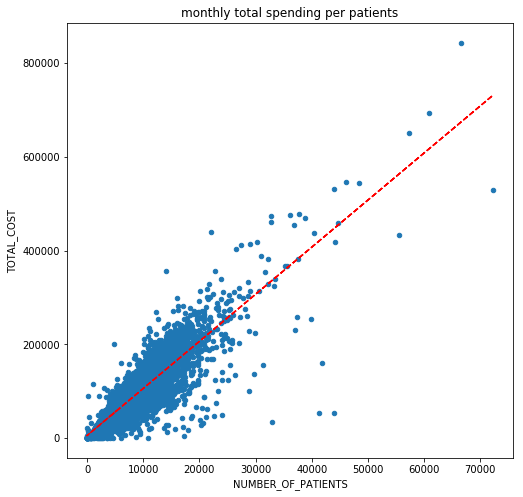

In [376]:
plot1 = GP_TOTAL.plot.scatter(x ='NUMBER_OF_PATIENTS', y ='TOTAL_COST', title ='monthly total spending per patients',s=None, figsize=(8,8))
max_x = floor(GP_TOTAL.NUMBER_OF_PATIENTS.max())
max_y = floor(GP_TOTAL.TOTAL_COST.max())

x = GP_TOTAL['NUMBER_OF_PATIENTS']
y = GP_TOTAL['TOTAL_COST']
z = np.polyfit(x, y, deg=1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plot1.set_xlabel = ("total amount of patients")
plot1.set_ylabel = ("total costs")
plot1.set_xlim = (0, max_x)
plot1.set_ylim = (0, max_y)


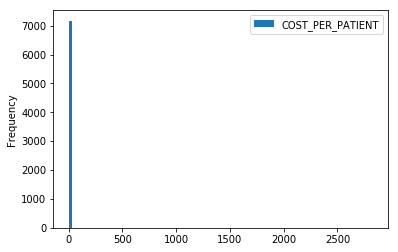

In [400]:
#Q4-2
cost_per_patient = pd.DataFrame(GP_TOTAL['COST_PER_PATIENT'])
#x = GP_TOTAL.COST_PER_PATIENT.values

cost_per_patient.plot.hist(by=np, bins=100)

#plt.xlim=(0,20)


# Assignment B

Background 

The second part of this report will discuss the mortality in different countries and the cause or circumstance of death using the WHO Mortality Database, which collects data from national authorities worldwide. Moreover, this dataset reports the cause of death by the 10th revision of the International Classification of Diseases (ICD-10) because when a mortality event happens, it is recorded at the local civil registry and then all information will be accumulated by National authority and submitted to WHO every year. 

Methods 

Firstly, we download and read raw data about population and live births, mortality ICD-10 and country codes from the WHO website and name them as ‘population’, ‘country’ and ‘morticd10’ that is merged by two parts of mortality ICD-10 file. In the population file, ‘Pop1’ represents the total number of all ages, the same meaning as ‘Deaths1’ in the morticd10 file. Pop2 and Deaths2 mean the population and number of deaths at year 0 while Pop25 and Deaths25 mean population and number of deaths at year 95 or over.

Since population and number of deaths in Iceland, Italy and New Zealand need to be calculated, then we search the country codes for these three countries respectively (4160, 4180, 5150). After that, we select population in Iceland in 2010 by fixing the ‘Country’ to 4160 and ‘Year’ to 2010. It is necessary to sum the ‘Pop1’ of two sex in one country, thus we obtain the population of Iceland in 2010 is 318041. Similarly, population of Italy and New Zealand in 2010 is 60483386 and 4367360. To calculate the total number of deaths, the method is identical. As death records for 2010 are all shown on the second part of morticd10, we directly pick out the country code 4160 and add ‘Deaths1’ under same country code together, where the final result turn to be 4038. Total numbers of deaths in Italy and New Zealand in 2010 are 1169230 and 57298. To conclude, Iceland had the least population and least number of deaths in 2010 whereas Italy had the largest amount of population and death events.

In [403]:
#Q1
#read the pop file
population = pd.read_csv ('POP')
population.head()

,Country,Admin1,SubDiv,Year,Sex,Frmat,Pop1,Pop2,Pop3,Pop4,...,Pop18,Pop19,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop26,Lb
0,1060,NaN,NaN,1980,1,7,137100.0,3400.0,15800.0,NaN,...,NaN,5300.0,NaN,2900.0,NaN,NaN,NaN,NaN,6500.0,5000.0
1,1060,NaN,NaN,1980,2,7,159000.0,4000.0,18400.0,NaN,...,NaN,6200.0,NaN,3400.0,NaN,NaN,NaN,NaN,7500.0,6000.0
2,1125,NaN,NaN,1955,1,2,5051500.0,150300.0,543400.0,NaN,...,110200.0,51100.0,41600.0,14300.0,11800.0,25300.0,NaN,NaN,0.0,253329.0
3,1125,NaN,NaN,1955,2,2,5049400.0,145200.0,551000.0,NaN,...,122100.0,51100.0,50700.0,15800.0,18000.0,28500.0,NaN,NaN,0.0,237901.0
4,1125,NaN,NaN,1956,1,2,5353700.0,158700.0,576600.0,NaN,...,116900.0,54100.0,44000.0,14900.0,12400.0,26600.0,NaN,NaN,0.0,250022.0


In [404]:
# read the mort file
morticd10_1 = pd.read_csv ('Morticd10_part1 2')
morticd10_2 = pd.read_csv ('Morticd10_part2')

/Users/apple/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/apple/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [405]:
country = pd.read_csv ('country_codes')
country.head()

,country,name
0,1010,Algeria
1,1020,Angola
2,1025,Benin
3,1030,Botswana
4,1035,Burkina Faso


In [406]:
#find out code for Iceland
country.loc[country['name'] == 'Iceland']

,country,name
174,4160,Iceland


In [407]:
#find out code for Italy
country.loc[country['name'] == 'Italy']

,country,name
176,4180,Italy


In [408]:
#find out code for New Zealand
country.loc[country['name'] == 'New Zealand']

,country,name
218,5150,New Zealand


In [411]:
morticd2010 = morticd10_2.loc[morticd10_2['Year']==2010]

In [412]:
#merge mortality from two parts: morticd10
df1 = pd.DataFrame(morticd10_1)
df2 = pd.DataFrame(morticd10_2)
morticd10 = pd.concat([df1,df2])

In [413]:
#total deaths for Iceland, Italy, New Zealand
Iceland_deaths = morticd2010.loc[morticd2010['Country']==4160].Deaths1.sum()
Italy_deaths = morticd2010.loc[morticd2010['Country']==4180].Deaths1.sum()
New_Zealand_deaths = morticd2010.loc[morticd2010['Country']==5150].Deaths1.sum()
print(Iceland_deaths, Italy_deaths,New_Zealand_deaths)

4038 1169230 57298


In [414]:
#define population in 2010
pop_2010 = population.loc[population['Year'] == 2010]

#total population for Iceland, Italy, New Zealand
Iceland_pop = pop_2010.loc[pop_2010['Country']==4160].Pop1.sum()
Italy_pop = pop_2010.loc[pop_2010['Country']==4180].Pop1.sum()
New_Zealand_pop = pop_2010.loc[pop_2010['Country']==5150].Pop1.sum()
print(Iceland_pop, Italy_pop, New_Zealand_pop)

318041.0 60483386.0 4367360.0


As has mentioned before, ‘Deaths1’ indicates the total number of deaths. Then, ‘Deaths2’ to ‘Death25’ represent the death distribution over all age group. For example, if the distribution of deaths by age group in Italy need to be clarified, it will be convenient to demonstrate it by graph where the x-axis is ‘Deaths by age group in Italy’ and the y-axis is ‘Frequency’. After matching country code with 4180, we sum numbers of deaths of all causes at every age group and list them according to the age order. Finally, we set the label as well as title, and the histogram is finished with a lift-skewed normal distribution curve, which indicates that it is most likely to cause death among people around age group 20 (at age 70-74 years). 

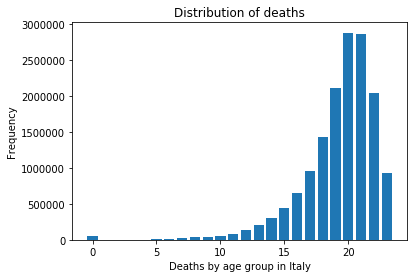

In [415]:
#Q2
deaths_Italy = morticd10.loc[morticd10['Country']==4180].sum()
deaths_Italy_list = deaths_Italy.tolist()
plt.bar(range(len(deaths_Italy_list[10:34])), deaths_Italy_list[10:34])
plt.xlabel("Deaths by age group in Italy")
plt.ylabel("Frequency")
plt.title("Distribution of deaths")
plt.show()

Thirdly, we attempt to point out the top 5 causes of death for the Neoplasm ICD10-category in Italy. As long as the list of ‘Cause’ obtaining from Italy morticd10 table being sorted in the ascending order, we are able to find out the indexes for ‘C000’ and ‘D489’ since C00-D48 are regarded to Neoplasm. Next, we generate a table and add one more column called ‘Boolean value’ to ensure it is a Neoplasm death table for Italy. Last but not least, we add the ‘Deaths1’ belonging to the same cause code and group a new table by ‘Cause’, whose another column is ‘Deaths1’, then after sorting it in the ascending order we can obtain the top 5 causes. 

In [416]:
#Q3
#list all cause
Italy_1 = morticd10.loc[morticd10['Country']==4180]
Italy_2 = Italy_1['Cause'].tolist()
Italy_3 = list(set(Italy_2))
Italy_3.sort()

#find the index for C00 and D48
Italy_3.index('C000'), Italy_3.index('D489')

(320, 939)

In [417]:
#generate the morticd10 table within C00-D48
Italy_4 = Italy_3[320:940]  #list of causes between C00 and D48
Italy_4_list = morticd10.Cause.isin(Italy_4)
morticd10cp = morticd10.copy()
morticd10cp['Boolean_value'] = Italy_4_list
Neoplasms = morticd10cp.loc[morticd10cp['Boolean_value']==1]

# C00-D48 in Italy
Italy_5 = Neoplasms.loc[Neoplasms['Country']==4180]
Italy_5.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,Boolean_value
1053596,4180,NaN,NaN,2003,104,C000,1,0,1,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
1053597,4180,NaN,NaN,2003,104,C000,2,0,1,7,...,0.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,True
1053598,4180,NaN,NaN,2003,104,C001,1,0,1,21,...,7.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
1053599,4180,NaN,NaN,2003,104,C001,2,0,1,5,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,True
1053600,4180,NaN,NaN,2003,104,C009,1,0,1,24,...,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,True


In [418]:
#calculate the sum of death
Italy_cause = Italy_5.groupby(['Cause']).sum()

#select the top five causes
Italy_6 = Italy_cause.sort_values(by='Deaths1', ascending=False)
Italy_6.head()
Italy_7 = pd.DataFrame(Italy_6['Deaths1'])
Italy_7.head()

,Deaths1
Cause,
C349,426451
C509,155895
C189,143188
C169,125679
C259,120070


Since the proportion of overall deaths is needed, a new column called ‘Proportion’ needs to be added into the cause table. The top one cause of death is C394, malignant neoplasm of larynx and trachea/bronchus/lung, which means patients with this type of neoplasm will have larger possibility to die. If a pie chart is utilised to present the proportion of causes, there will be six parts containing top 5 causes and ‘others’, which is the sum of other causes’ proportion. That means, we need to add one more row to the cause table we worked out above because pie chart requires a list of all proportion. We draw the pie chart through pandas. From the graph we can figure out that causes in top five other than C349 occupy the similar space and other causes take up 56.8% of the whole area.

In [419]:
Italy_7['Proportion']= Italy_7['Deaths1']/Italy_7.Deaths1.sum()
top5 = Italy_7.head(5)
top5

,Deaths1,Proportion
Cause,,
C349,426451,0.189647
C509,155895,0.069328
C189,143188,0.063677
C169,125679,0.055891
C259,120070,0.053396


In [421]:
#Q3-2
#calculate the proportion for the rest causes
proportion_others = 1 - top5.Proportion.sum()
deaths1_others = proportion_others * Italy_7.Deaths1.sum()
proportion_others, deaths1_others

(0.568061615334637, 1277378.0)

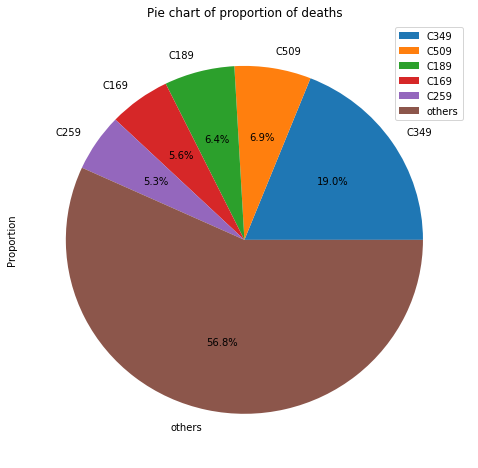

In [422]:
#draw the pie chart
others = {'Deaths1':[1277378],'Proportion':[0.568062]}
proportion_pie = pd.concat([top5,pd.DataFrame(others,index=['Others'])])
proportion = pd.DataFrame({'Proportion':list(proportion_pie['Proportion'].head(6))},
                         index=['C349','C509', 'C189','C169','C259','others'])
plt = proportion.plot(y='Proportion',figsize=(8,8), autopct='%1.1f%%', title = 'Pie chart of proportion of deaths', kind = 'pie')

For the next task top five age groups are required to identify with Neoplasm in Australia for 2010. Originally, we check the country code and observe that Australia code is 5020. After matching ‘Country’ with 5020 and ‘Year’ with 2010 in morticd10 table, we sum all rows in columns from ‘Deaths1’ to ‘IM deaths4’, which means infant death at age 28-364 days, to calculate the total numbers of deaths at each age group. Following is sorting  in an ascending order and we show the top 6 because the first one represents the deaths at all age group. The result is that people aging 80-84 years (age group 22)in Australia have the largest probability to die of Neoplasms.

In [423]:
#Q4
# check the country code for Australia
country.loc[country['name'] == 'Australia']

,country,name
211,5020,Australia


In [424]:
#find Australia in the Neoplasmes table
Aus_neo = Neoplasms.loc[Neoplasms['Country'] == 5020]
Aus_neo.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,Boolean_value
1323109,5020,NaN,NaN,1998,104,C001,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
1323110,5020,NaN,NaN,1998,104,C001,2,0,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,True
1323111,5020,NaN,NaN,1998,104,C005,2,0,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
1323112,5020,NaN,NaN,1998,104,C009,1,0,1,6,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,True
1323113,5020,NaN,NaN,1998,104,C009,2,0,1,3,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,True


In [425]:
# morticd10 for Australia with Neolasms in 2010
Aus_neo_2010 = Aus_neo.loc[Aus_neo['Year']==2010]

#total death for age group
Aus_neo_2010_age = Aus_neo_2010.sum()[9:35]
AUS_NEO = pd.DataFrame(Aus_neo_2010_age.sort_values(ascending = False),columns = ['Death_Number'])
AUS_NEO.head(6)

,Death_Number
Deaths1,43315
Deaths22,7167
Deaths21,6291
Deaths20,5713
Deaths23,5520
Deaths19,4768


Eventually, we compare the difference between Italy and Australia from the aspects of population and number of death due to Neoplasms. At the beginning, we select all population records with country code equals to 5020, sum the death number at each age group and group them by the age. After sorting them we can find that ‘Pop11’ (at 25-29 years) has the largest space in population of Australia and people in 25-49 years occupy top 6, which indicates that overall population is young in Australia. We can apply the same process to figure out the population in Italy and the result is that ‘Pop14’ (at 40-44 years) get the first place in Italy. People with age from 30-64 years take up the top6, which reveals that population in Italy is slightly elder than that in Australia. The line chart will demonstrate it directly that there is apparently more population in Italy while the distributions by age group are similar that large part people in both countries are young or middle-aged. However, in Italy, population in middle-aged group is almost five times larger than that in children group or old people group whereas the difference in Australia is not steep. 

In [426]:
#Q5
#population by age group in Australia
Aus_pop_2010 = pop_2010.loc[pop_2010['Country']==5020]
Aus_pop_2010_agesum = Aus_pop_2010.sum()[7:34]
Aus_pop_2010_agerank = pd.DataFrame(Aus_pop_2010_agesum.sort_values(ascending=False), columns = ['Number'])

#top 6 pop in Aus
Aus_pop_2010_agerank.head(6)

,Number
Pop11,1657438.0
Pop10,1642263.0
Pop13,1616023.0
Pop15,1575858.0
Pop14,1549610.0
Pop12,1528993.0


In [427]:
#population by age group in Italy 
Italy_pop_2010 = pop_2010.loc[pop_2010['Country']==4180]
Italy_pop_2010_agesum = Italy_pop_2010.sum()[7:34]
Italy_pop_2010_agerank = pd.DataFrame(Italy_pop_2010_agesum.sort_values(ascending=False), columns = ['Number'])

#top 6 pop in Italy
Italy_pop_2010_agerank.head(6)

,Number
Pop14,4949158.0
Pop13,4799943.0
Pop15,4717717.0
Pop12,4132871.0
Pop16,4095185.0
Pop18,3757507.0


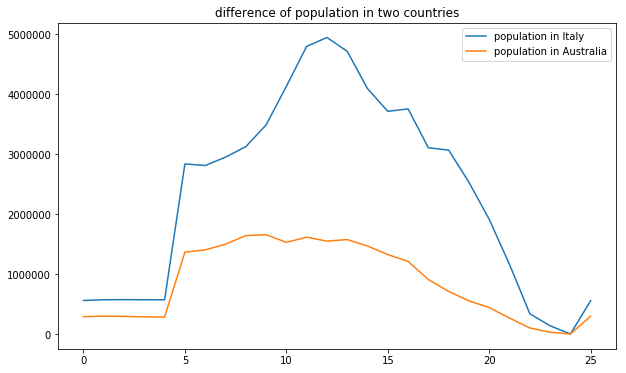

In [428]:
#difference in pop
dfpop = pd.DataFrame({
       'population in Italy': list(Italy_pop_2010_agesum),
       'population in Australia': list(Aus_pop_2010_agesum)
       })

dfpop.plot.line( figsize=(10,6), title = 'difference of population in two countries', fontsize=10)

When it comes to difference of Neoplasms death between two countries, we can still draw a line chart to clarify it as death distributions for both countries have been worked out in Question 2 and Question 4. Generally, number of deaths in Italy is bigger than that in Australia and its curve shows a lift-skewed bell shape indicating a normal distribution while the curve of Australia is flat. What has been observed is that people at 70-74 years have the largest probability to die of Neoplasms in Italy, however, death number in Australia is obviously small and below 10000.

In [429]:
#group sum of the death number by age group
Aus_neo_2010_agegrp = Aus_neo_2010.sum()[10:35]
Italy_neo_2010_agegrp = Italy_5.sum()[10:35]

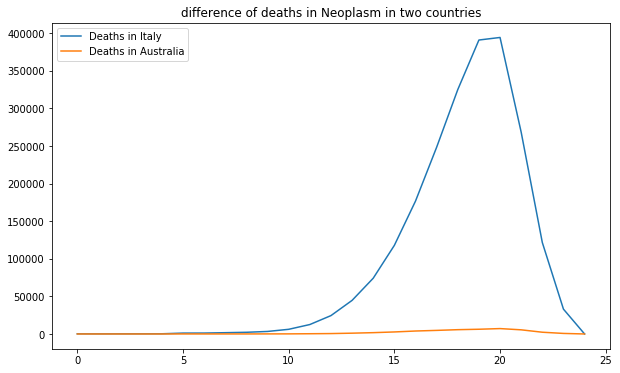

In [430]:
#difference in deaths
#line chart
dfdeath = pd.DataFrame({
       'Deaths in Italy': list(Italy_neo_2010_agegrp),
       'Deaths in Australia': list(Aus_neo_2010_agegrp)
       })

dfdeath.plot.line( figsize=(10,6), title = 'difference of deaths in Neoplasm in two countries', fontsize=10)